In [1]:
%matplotlib inline

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import fiona
import pprint
import os
from osgeo import gdal,ogr,osr,gdalnumeric
import numpy as np
pd.options.display.max_rows = 20

In [2]:
ds84 = gdal.Open( "data/Classify_84.tif" )
ds88 = gdal.Open( "data/Classify_88.tif" )

In [3]:
srcband84 = ds84.GetRasterBand(1)
srcband88 = ds88.GetRasterBand(1)

In [4]:
dst_layername = "Shape"
drv = ogr.GetDriverByName("ESRI Shapefile")
if os.path.exists("data/new_shp/classify84.shp"): drv.DeleteDataSource("data/new_shp/classify84.shp")
if os.path.exists("data/new_shp/classify84.shp"): drv.DeleteDataSource("data/new_shp/classify84.shp")

In [5]:
dst_ds84 = drv.CreateDataSource( "data/new_shp/classify84.shp" )
dst_ds88 = drv.CreateDataSource( "data/new_shp/classify88.shp" )


In [6]:
srs84 = osr.SpatialReference()
srs84.ImportFromWkt( ds84.GetProjectionRef() )

srs88 = osr.SpatialReference()
srs88.ImportFromWkt( ds88.GetProjectionRef() )

0

In [7]:
dst_layer84 = dst_ds84.CreateLayer(dst_layername, srs84)
dst_layer88 = dst_ds88.CreateLayer(dst_layername, srs88)

In [8]:
dst_layer84.CreateField(ogr.FieldDefn("DN", ogr.OFTInteger))
dst_layer88.CreateField(ogr.FieldDefn("DN", ogr.OFTInteger))

0

In [9]:
gdal.Polygonize( srcband84, None, dst_layer84, 0, [], callback=None)
gdal.Polygonize( srcband88, None, dst_layer88, 0, [], callback=None)

0

In [10]:
dst_ds84.Destroy()
ds84=None
srcband84=None

dst_ds88.Destroy()
ds88=None
srcband88=None

In [11]:
ioShpFile84 = ogr.Open("data/new_shp/classify84.shp", update = 1)
ioShpFile88 = ogr.Open("data/new_shp/classify88.shp", update = 1)

In [12]:
lyr84 = ioShpFile84.GetLayerByIndex(0)
            
lyr84.ResetReading()    

for i in lyr84:
    lyr84.SetFeature(i)
    if i.GetField('DN')!=1:
        lyr84.DeleteFeature(i.GetFID())        
ioShpFile84.Destroy()

In [13]:
lyr88 = ioShpFile88.GetLayerByIndex(0)
            
lyr88.ResetReading()    

for i in lyr88:
    lyr88.SetFeature(i)
    if i.GetField('DN')!=2:
        lyr88.DeleteFeature(i.GetFID())        
ioShpFile88.Destroy()

In [14]:
classify84 = geopandas.read_file('data/new_shp/classify84.shp')
classify88 = geopandas.read_file('data/new_shp/classify88.shp')

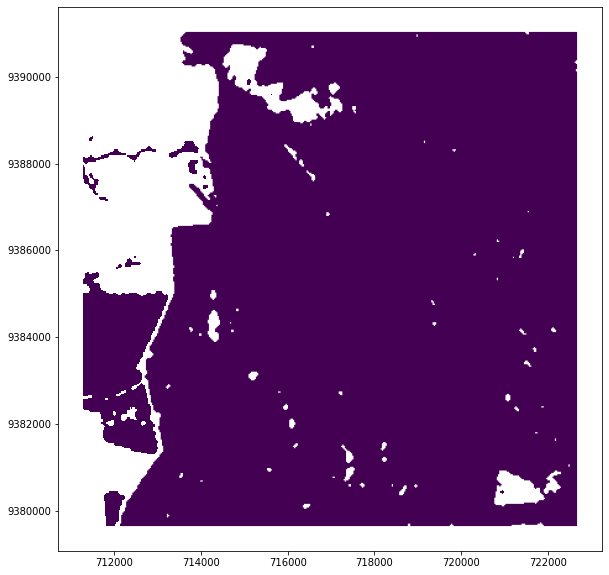

In [15]:
classify84.plot(column = "DN", figsize=(10, 10))

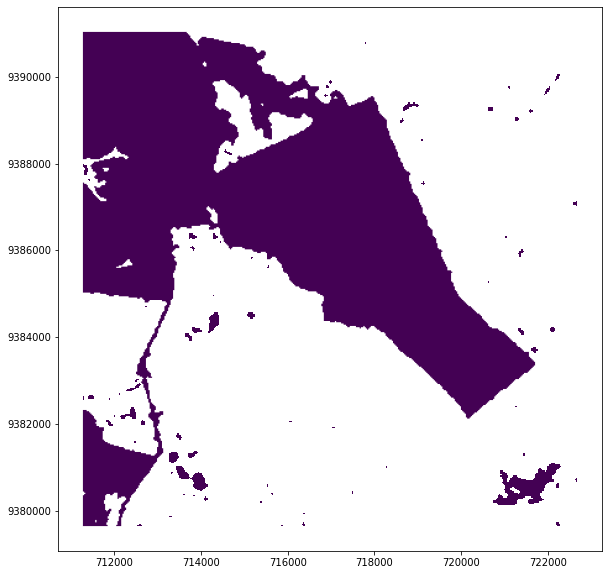

In [16]:
classify88.plot(column = "DN", figsize=(10, 10))

In [17]:
classify_union = geopandas.overlay(classify84, classify88, how='union')

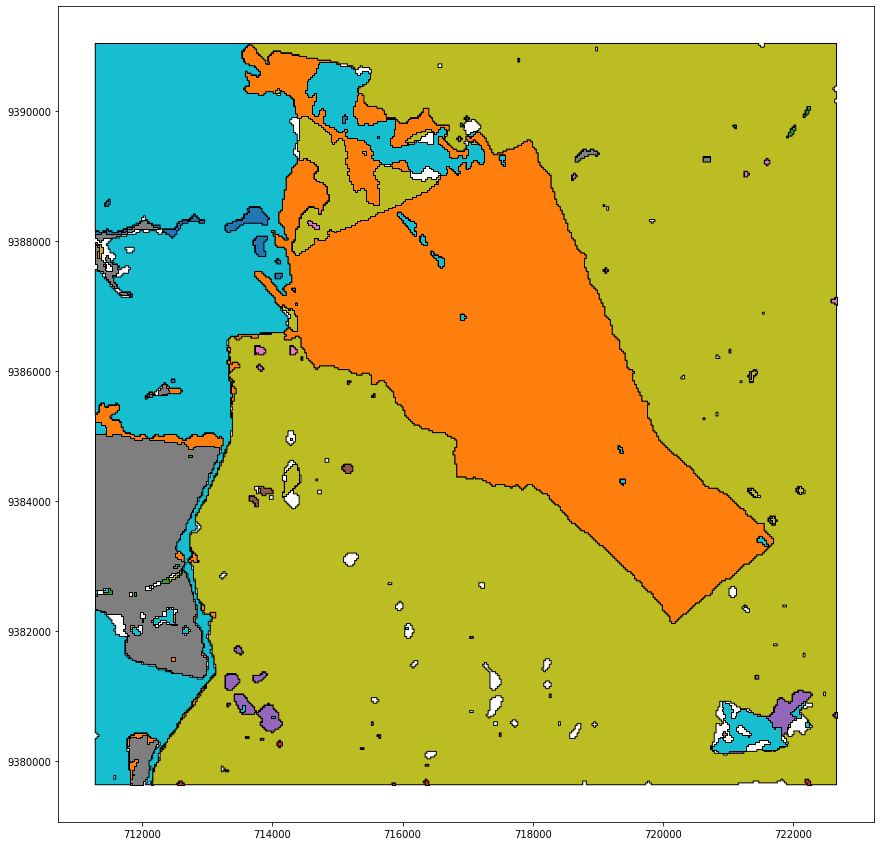

In [18]:
classify_union.plot(edgecolor='k', cmap='tab10', figsize=(15, 15))